# imports and defs

In [1]:
import numpy as np
import bcsd_module_future_normal as bb
import matplotlib.pyplot as plt
import utility_module_2_v_3 as uu
from datetime import datetime
import pandas as pd


In [2]:
def check_for_nans_infs_zeros(data_sts):
    print('Nans:',np.sum(np.isnan(data_sts)))
    print('Infs:' ,np.sum(np.isinf(data_sts)))
    print('Zeros:',np.sum((data_sts==0)))
    

In [3]:
def printr(text):
    print("\x1b[31m" + text+ "\x1b[0m")

In [4]:
## check dimensions and plot ts
def data_check(data_sts,lat,lon,metadata,Np= 12):
    check_for_nans_infs_zeros(data_sts)
    map_bounds=metadata['data_bounds'] #[50 , 50, 110, 0] #ltrb
    mp_spacing=10

    plt.figure(figsize = (10,2))

    plt.subplot(121)
    uu.map_plot_cyl(np.nanmean(data_sts[:,:,:],axis=0),lat,lon,map_bounds,mp_spacing=10)
    plt.title('Mean')

    plt.subplot(122)
    plt.plot(data_sts[:Np*5,int(lat.shape[0]/2),int(lon.shape[0]/2)])
    plt.plot(data_sts[-Np*5:,int(lat.shape[0]/2),int(lon.shape[0]/2)])


In [5]:
print(data_check)

<function data_check at 0x7fea282fa3a0>


In [6]:
['GFDL_CM3','CanESM2','MIROC_ESM','MRI_ESM1','ACCESS1_0','NorESM1_M','CM5A_LR','CNRM_CM5','MPI_ESM_MR']

['GFDL_CM3',
 'CanESM2',
 'MIROC_ESM',
 'MRI_ESM1',
 'ACCESS1_0',
 'NorESM1_M',
 'CM5A_LR',
 'CNRM_CM5',
 'MPI_ESM_MR']

# Exp details

In [7]:
exp_names =['India_P_BCSDd',
            'India_P_BCSDd_eqm',
            'India_P_BCSDd_CH',
            'India_P_BCSDd_CH_eqm',
            'India_T_BCSDd',
            'India_T_BCSDd_eqm',
            'India_P_BCSDd_NY',
            'India_P_BCSDd_NY_eqm',

           ]

SD_types = ['PREC','PREC','PREC','PREC','TEMP','TEMP','PREC','PREC',]
bc_methods = [bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,
              bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,
              bb.normal_quantile_mapping,bb.empirical_quantile_mapping,
              bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,]
var_types = ['pre','pre','pre','pre','tas','tas','pre','pre']

df = pd.DataFrame(list(zip(exp_names, SD_types,bc_methods,var_types)),
               columns =['exp_names', 'SD_types','bc_methods', 'var_types'])
df

,exp_names,SD_types,bc_methods,var_types
0,India_P_BCSDd,PREC,<function gamma_quantile_mapping at 0x7fe9e084...,pre
1,India_P_BCSDd_eqm,PREC,<function empirical_quantile_mapping at 0x7fe9...,pre
2,India_P_BCSDd_CH,PREC,<function gamma_quantile_mapping at 0x7fe9e084...,pre
3,India_P_BCSDd_CH_eqm,PREC,<function empirical_quantile_mapping at 0x7fe9...,pre
4,India_T_BCSDd,TEMP,<function normal_quantile_mapping at 0x7fea2ba...,tas
5,India_T_BCSDd_eqm,TEMP,<function empirical_quantile_mapping at 0x7fe9...,tas
6,India_P_BCSDd_NY,PREC,<function gamma_quantile_mapping at 0x7fe9e084...,pre
7,India_P_BCSDd_NY_eqm,PREC,<function empirical_quantile_mapping at 0x7fe9...,pre


# Runs

In [8]:
# 
for gcm_name in ['CanESM2','GFDL_CM3','MIROC_ESM','MRI_ESM1','ACCESS1_0','NorESM1_M','CM5A_LR','CNRM_CM5','MPI_ESM_MR']:
    for itr in [0]:
        exp_name = df['exp_names'][itr]
        SD_type = df['SD_types'][itr]
        bc_method = df['bc_methods'][itr]
        var_type = df['var_types'][itr]

        path_out = '/home/vikram/BCSD_data/' + exp_name  + '/'
        metadata = np.load(path_out+'bcsd_imd_metadata_'+gcm_name + '.npy',allow_pickle=True).item()
        pre_obs_train = np.load(path_out+'data_obs_imd_train'+ '.npy')
        pre_gcm_train = np.load(path_out+'data_gcm_'+gcm_name+'_imd_train.npy')
        pre_gcm_test= np.load(path_out+'data_gcm_'+gcm_name+'_imd_pred.npy') 
        
        pre_gcm_future= np.load(path_out+'data_gcm_'+gcm_name+'_future.npy') 

        path_out = metadata['path_out'] 
        print(path_out)

        print("Experiment Name:",exp_name,"::",gcm_name)

        if np.sum(np.isnan(pre_obs_train)) > 0:
            printr(str(np.sum(np.isnan(pre_obs_train))) + " nans fixed with average")
            pre_obs_train[np.isnan(pre_obs_train)] =np.nanmean(pre_obs_train)



        print("Started at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
        print('GCM name : ', gcm_name)
        print('Output path : ',path_out)

        data_bcsd_pred = bb.bcsd(var_type + '_'+gcm_name,pre_obs_train,pre_gcm_train,pre_gcm_future,metadata,
                                 bc_method,temporal_res = "Daily",sd_type =SD_type,mode = 1)


/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: CanESM2
Started at: 29/09/2023 21:15:38
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 14, 14) (18250, 14, 14) (34675, 14, 14)
14 14


 29%|██▊       | 4/14 [01:29<03:32, 21.25s/it]/home/vikram/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2757: RuntimeWarning: divide by zero encountered in double_scalars
  aest = (3-s + np.sqrt((s-3)**2 + 24*s)) / (12*s)
/home/vikram/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2756: RuntimeWarning: invalid value encountered in double_scalars
  func = lambda a: np.log(a) - sc.digamma(a) - s
 36%|███▌      | 5/14 [01:44<02:52, 19.15s/it]/home/vikram/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2738: RuntimeWarning: Mean of empty slice.
  xbar = data.mean()
/home/vikram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/vikram/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2755: RuntimeWarning: Mean of empty slice.
  s = np.log(xbar) - np.log(data).mean()
100%|██████

Output shape (34675, 14, 14)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 14, 14)


100%|█| 34675/34675 [00:16<00:00, 2078.92it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: GFDL_CM3
Started at: 29/09/2023 21:19:22
GCM name :  GFDL_CM3
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 19, 16) (18250, 19, 16) (34675, 19, 16)
19 16


100%|█████████| 19/19 [05:45<00:00, 18.18s/it]


Output shape (34675, 19, 16)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 19, 16)


100%|█| 34675/34675 [00:14<00:00, 2426.12it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: MIROC_ESM
Started at: 29/09/2023 21:25:31
GCM name :  MIROC_ESM
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 14, 14) (18250, 14, 14) (34675, 14, 14)
14 14


100%|█████████| 14/14 [03:29<00:00, 14.97s/it]


Output shape (34675, 14, 14)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 14, 14)


100%|███| 34675/34675 [00:13<00:00, 2506.39it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: MRI_ESM1
Started at: 29/09/2023 21:29:25
GCM name :  MRI_ESM1
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 34, 33) (18250, 34, 33) (34675, 34, 33)
34 33


 12%|█▍          | 4/34 [02:26<17:33, 35.12s/it]/home/vikram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
100%|███████████| 34/34 [11:47<00:00, 20.81s/it]


Output shape (34675, 34, 33)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 34, 33)


100%|███| 34675/34675 [00:15<00:00, 2275.27it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: ACCESS1_0
Started at: 29/09/2023 21:41:39
GCM name :  ACCESS1_0
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 29, 21) (18250, 29, 21) (34675, 29, 21)
29 21


100%|███████████| 29/29 [17:33<00:00, 36.32s/it]


Output shape (34675, 29, 21)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 29, 21)


100%|███| 34675/34675 [00:14<00:00, 2431.76it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: NorESM1_M
Started at: 29/09/2023 21:59:35
GCM name :  NorESM1_M
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 20, 15) (18250, 20, 15) (34675, 20, 15)
20 15


100%|███████████| 20/20 [04:34<00:00, 13.71s/it]


Output shape (34675, 20, 15)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 20, 15)


100%|███| 34675/34675 [00:13<00:00, 2502.91it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: CM5A_LR
Started at: 29/09/2023 22:04:31
GCM name :  CM5A_LR
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 20, 11) (18250, 20, 11) (34675, 20, 11)
20 11


100%|███████████| 20/20 [03:05<00:00,  9.29s/it]


Output shape (34675, 20, 11)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 20, 11)


100%|███| 34675/34675 [00:13<00:00, 2495.92it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: CNRM_CM5
Started at: 29/09/2023 22:07:59
GCM name :  CNRM_CM5
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 27, 27) (18250, 27, 27) (34675, 27, 27)
27 27


100%|███████████| 27/27 [11:36<00:00, 25.80s/it]


Output shape (34675, 27, 27)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 27, 27)


100%|███| 34675/34675 [00:14<00:00, 2384.48it/s]


SD Output shape (34675, 33, 35)
/home/vikram/BCSD_data/India_P_BCSDd/
Experiment Name: India_P_BCSDd :: MPI_ESM_MR
Started at: 29/09/2023 22:19:59
GCM name :  MPI_ESM_MR
Output path :  /home/vikram/BCSD_data/India_P_BCSDd/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 95.0
Bias correction fucntion : <function gamma_quantile_mapping at 0x7fe9e084a040>
Input shape (18250, 20, 21) (18250, 20, 21) (34675, 20, 21)
20 21


100%|███████████| 20/20 [04:52<00:00, 14.64s/it]


Output shape (34675, 20, 21)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  34675
SD Input shape (18250, 33, 35) (34675, 20, 21)


100%|███| 34675/34675 [00:13<00:00, 2481.18it/s]


SD Output shape (34675, 33, 35)


# Exp details

In [6]:
exp_names =['India_P_BCSDd',
            'India_P_BCSDd_eqm',
            'India_P_BCSDd_CH',
            'India_P_BCSDd_CH_eqm',
            'India_T_BCSDd',
            'India_T_BCSDd_eqm',
            'India_P_BCSDd_NY',
            'India_P_BCSDd_NY_eqm',

           ]

SD_types = ['PREC','PREC','PREC','PREC','TEMP','TEMP','PREC','PREC',]
bc_methods = [bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,
              bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,
              bb.normal_quantile_mapping,bb.empirical_quantile_mapping,
              bb.gamma_quantile_mapping,bb.empirical_quantile_mapping,]
var_types = ['pre','pre','pre','pre','tas','tas','pre','pre']

df = pd.DataFrame(list(zip(exp_names, SD_types,bc_methods,var_types)),
               columns =['exp_names', 'SD_types','bc_methods', 'var_types'])
df

,exp_names,SD_types,bc_methods,var_types
0,India_P_BCSDd,PREC,<function gamma_quantile_mapping at 0x7efe6ed3...,pre
1,India_P_BCSDd_eqm,PREC,<function empirical_quantile_mapping at 0x7efe...,pre
2,India_P_BCSDd_CH,PREC,<function gamma_quantile_mapping at 0x7efe6ed3...,pre
3,India_P_BCSDd_CH_eqm,PREC,<function empirical_quantile_mapping at 0x7efe...,pre
4,India_T_BCSDd,TEMP,<function normal_quantile_mapping at 0x7efeb9e...,tas
5,India_T_BCSDd_eqm,TEMP,<function empirical_quantile_mapping at 0x7efe...,tas
6,India_P_BCSDd_NY,PREC,<function gamma_quantile_mapping at 0x7efe6ed3...,pre
7,India_P_BCSDd_NY_eqm,PREC,<function empirical_quantile_mapping at 0x7efe...,pre


# Runs

PREC
Experiment Name: India_P_BCSDd_eqm

Data precheck :
Nans: 0
Infs: 0
Zeros: 13942423
Nans: 0
Infs: 0
Zeros: 634365
Nans: 0
Infs: 0
Zeros: 0
Started at: 17/09/2023 13:55:37
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/India_P_BCSDd_eqm/
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 105.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7efe6ed3c0d0>
Input shape (18250, 14, 14) (18250, 14, 14) (38325, 14, 14)
14 14


100%|███████████████████████████████████████████| 14/14 [01:48<00:00,  7.76s/it]


Output shape (38325, 14, 14)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  38325
SD Input shape (18250, 33, 35) (38325, 14, 14)


100%|███████████████████████████████████| 38325/38325 [00:16<00:00, 2342.18it/s]


SD Output shape (38325, 33, 35)
Bias Correction Spatially - daily:
Training years : 50.0 == 50.0
Testing years : 105.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7efe6ed3c0d0>
Input shape (18250, 14, 14) (18250, 14, 14) (38325, 14, 14)
14 14


100%|███████████████████████████████████████████| 14/14 [01:45<00:00,  7.53s/it]


Output shape (38325, 14, 14)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  38325
SD Input shape (18250, 33, 35) (38325, 14, 14)


100%|███████████████████████████████████| 38325/38325 [00:16<00:00, 2377.14it/s]


SD Output shape (38325, 33, 35)
Finished at: 17/09/2023 14:00:02


Data postcheck :
Nans: 0
Infs: 0
Zeros: 18507147
Nans: 0
Infs: 0
Zeros: 17814510
Experiment Name: India_T_BCSDd_eqm

Data precheck :
Nans: 2420
Infs: 0
Zeros: 0
2420 nans fixed with average
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 0
Started at: 17/09/2023 14:00:07
GCM name :  CanESM2
Output path :  /home/vikram/BCSD_data/India_T_BCSDd_eqm/
Bias Correction Spatially - daily:
Training years : 25.0 == 25.0
Testing years : 55.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7efe6ed3c0d0>
Input shape (9125, 14, 14) (9125, 14, 14) (20075, 14, 14)
14 14


100%|███████████████████████████████████████████| 14/14 [01:44<00:00,  7.48s/it]


Output shape (20075, 14, 14)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  20075
SD Input shape (9125, 31, 31) (20075, 14, 14)


100%|███████████████████████████████████| 20075/20075 [00:06<00:00, 3067.59it/s]


SD Output shape (20075, 31, 31)
Bias Correction Spatially - daily:
Training years : 25.0 == 25.0
Testing years : 55.0
Bias correction fucntion : <function empirical_quantile_mapping at 0x7efe6ed3c0d0>
Input shape (9125, 14, 14) (9125, 14, 14) (20075, 14, 14)
14 14


100%|███████████████████████████████████████████| 14/14 [01:49<00:00,  7.85s/it]


Output shape (20075, 14, 14)
Spatial Disaggregation - Daily (NCLIM ==  365 )
SD Type - PREC
No of timesteps  20075
SD Input shape (9125, 31, 31) (20075, 14, 14)


100%|███████████████████████████████████| 20075/20075 [00:06<00:00, 2982.17it/s]


SD Output shape (20075, 31, 31)
Finished at: 17/09/2023 14:03:58


Data postcheck :
Nans: 0
Infs: 0
Zeros: 0
Nans: 0
Infs: 0
Zeros: 0


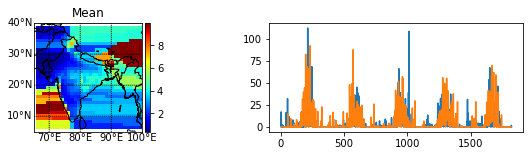

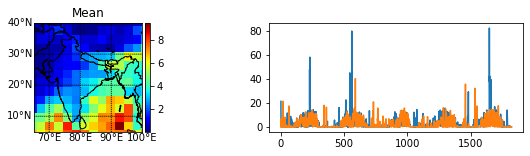

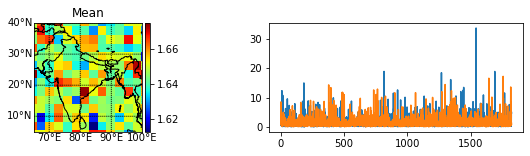

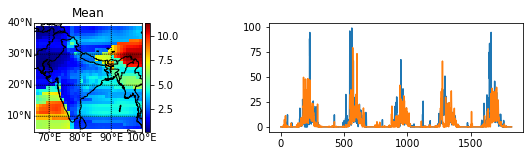

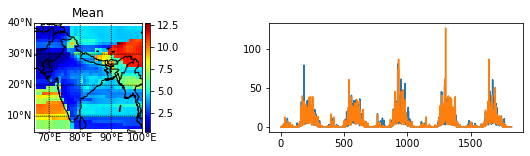

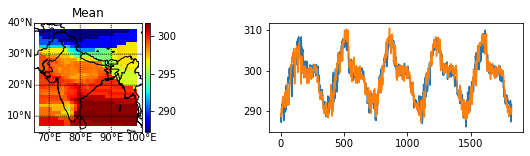

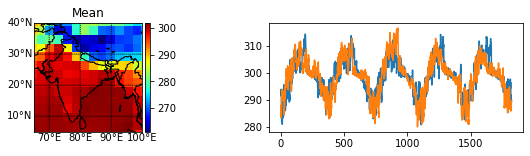

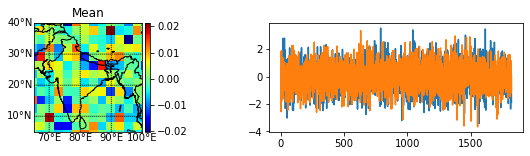

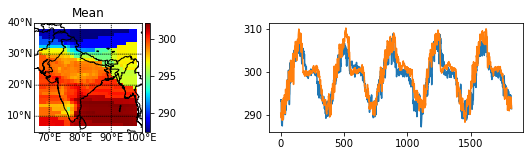

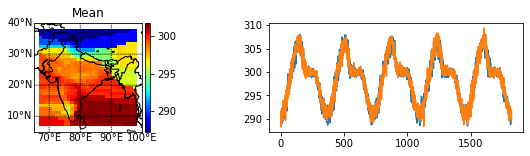

In [7]:

gcm_name ='CanESM2'
for itr in [0]:
    exp_name = df['exp_names'][itr]
    SD_type = df['SD_types'][itr]
    bc_method = df['bc_methods'][itr]
    var_type = df['var_types'][itr]
    
    path_out = '/home/vikram/BCSD_data/' + exp_name  + '/'
    metadata = np.load(path_out+'bcsd_imd_metadata_'+gcm_name + '.npy',allow_pickle=True).item()
    pre_obs_train = np.load(path_out+'data_obs_imd_train'+ '.npy')
    pre_gcm_train = np.load(path_out+'data_gcm_'+gcm_name+'_imd_train.npy')
    pre_gcm_test= np.load(path_out+'data_gcm_'+gcm_name+'_imd_pred.npy') 
    path_out = metadata['path_out']

    # rdn_train=  np.random.randn(pre_gcm_train.shape[0],pre_gcm_train.shape[1],pre_gcm_train.shape[2])*np.nanmean(pre_gcm_train)
    # rdn_test=  np.random.randn(pre_gcm_test.shape[0],pre_gcm_test.shape[1],pre_gcm_test.shape[2])*np.nanmean(pre_gcm_test)
    # rdn_train[rdn_train<0]=0
    # rdn_test[rdn_test<0]=0
    
    rdn_train=  np.random.randn(pre_gcm_train.shape[0],pre_gcm_train.shape[1],pre_gcm_train.shape[2])
    rdn_test=  np.random.randn(pre_gcm_test.shape[0],pre_gcm_test.shape[1],pre_gcm_test.shape[2])        
    if SD_type == 'PREC':
        rdn_train =np.exp(rdn_train) 
        rdn_test =np.exp(rdn_test) 
        print(SD_type)
    else:
        pass

    print("Experiment Name:",exp_name)
    print('\nData precheck :')

    data_check(pre_obs_train, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
    
    if np.sum(np.isnan(pre_obs_train)) > 0:
        printr(str(np.sum(np.isnan(pre_obs_train))) + " nans fixed with average")
        pre_obs_train[np.isnan(pre_obs_train)] =np.nanmean(pre_obs_train)
    data_check(pre_gcm_train, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
    data_check(rdn_test, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)

    path_out = metadata['path_out']


    print("Started at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
    print('GCM name : ', gcm_name)
    print('Output path : ',path_out)

    data_bcsd_pred = bb.bcsd(var_type + '_'+gcm_name,pre_obs_train,pre_gcm_train,pre_gcm_test,metadata,
                             bc_method,temporal_res = "Daily",sd_type =SD_type,mode = 1)

    data_bcsd_rnd = bb.bcsd(var_type + '_rnd_0',pre_obs_train,rdn_train,
                            rdn_test,metadata,bc_method,
                            temporal_res = "Daily",sd_type =SD_type,mode = 1)
    print("Finished at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))    
    
    
    print('\n\nData postcheck :')
    data_check(data_bcsd_pred, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
    data_check(data_bcsd_rnd, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)

## Indian Precipitation

In [ ]:
['India_P_BCSDd',
'India_P_BCSDd_CH',
'India_P_BCSDd_CH_eqm',
'India_P_BCSDd_eqm',
'India_T_BCSDd',
'India_T_BCSDd_eqm']



## Load data

In [ ]:
path_out = '/home/vikram/BCSD_data/India_P_BCSDd_CH_eqm/'
gcm_name ='CanESM2'
metadata = np.load(path_out+'bcsd_imd_metadata_'+gcm_name + '.npy',allow_pickle=True).item()
pre_obs_train = np.load(path_out+'data_obs_imd_train'+ '.npy')
pre_gcm_train = np.load(path_out+'data_gcm_'+gcm_name+'_imd_train.npy')
pre_gcm_test= np.load(path_out+'data_gcm_'+gcm_name+'_imd_pred.npy') 
path_out = metadata['path_out']

rdn_train=  np.random.randn(pre_gcm_train.shape[0],pre_gcm_train.shape[1],pre_gcm_train.shape[2])*np.nanmean(pre_gcm_train)
rdn_test=  np.random.randn(pre_gcm_test.shape[0],pre_gcm_test.shape[1],pre_gcm_test.shape[2])*np.nanmean(pre_gcm_test)
rdn_train[rdn_train<0]=0
rdn_test[rdn_test<0]=0


data_check(pre_obs_train, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
data_check(pre_gcm_train, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
data_check(rdn_test, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)


## Run BCSD


In [ ]:
print("Started at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
print('GCM name : ', gcm_name)
print('Output path : ',path_out)

data_bcsd_pred = bb.bcsd('pre_'+gcm_name,pre_obs_train,pre_gcm_train,pre_gcm_test,metadata,
                         bb.empirical_quantile_mapping,temporal_res = "Daily",sd_type ="PREC",mode = 1)

data_bcsd_rnd = bb.bcsd('pre_rnd_0',pre_obs_train,rdn_train,
                        rdn_test,metadata,bb.empirical_quantile_mapping,
                        temporal_res = "Daily",sd_type ="PREC",mode = 1)
print("Finished at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))


## Check

In [ ]:
data_check(pre_obs_train, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
data_check(pre_gcm_train, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
data_check(rdn_test, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
data_check(data_bcsd_pred, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
data_check(data_bcsd_rnd, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)


## Indian Precipitation CH

## Load data

In [ ]:
path_out = '/home/vikram/BCSD_data/India_P_BCSDd_salvi_new_emp/'
gcm_name ='CanESM2'
metadata = np.load(path_out+'bcsd_imd_metadata_'+gcm_name + '.npy',allow_pickle=True).item()
pre_obs_train = np.load(path_out+'data_obs_imd_train'+ '.npy')
pre_gcm_train = np.load(path_out+'data_gcm_'+gcm_name+'_imd_train.npy')
pre_gcm_test= np.load(path_out+'data_gcm_'+gcm_name+'_imd_pred.npy')
                        
path_out = metadata['path_out']

## Run BCSD


In [ ]:
print("Started at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
print('GCM name : ', gcm_name)
print('Output path : ',path_out)

data_bcsd_pred = bb.bcsd('pre_'+gcm_name,pre_obs_train,pre_gcm_train,pre_gcm_test,metadata,
                         bb.empirical_quantile_mapping,temporal_res = "Daily",sd_type ="PREC",mode = 1)

rdn_train=  np.random.randn(pre_gcm_train.shape[0],pre_gcm_train.shape[1],pre_gcm_train.shape[2])*np.nanmean(pre_gcm_train)
rdn_test=  np.random.randn(pre_gcm_test.shape[0],pre_gcm_test.shape[1],pre_gcm_test.shape[2])*np.nanmean(pre_gcm_test)
rdn_train[rdn_train<0]=0
rdn_test[rdn_test<0]=0
data_bcsd_rnd = bb.bcsd('pre_rnd_0',pre_obs_train,
                        rdn_train,rdn_test,metadata,bb.empirical_quantile_mapping,
                        temporal_res = "Daily",sd_type ="PREC",mode = 1)

print("Finished at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))


## Check

In [ ]:
data_check(pre_obs_train, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
data_check(pre_gcm_train, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
data_check(data_bcsd_pred, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
data_check(rdn_test, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
data_check(data_bcsd_rnd, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)


## Indian Temperature

## Load data

In [ ]:
path_out = '/home/vikram/BCSD_data/India_T_BCSDd_new/'
gcm_name ='CanESM2'
metadata = np.load(path_out+'bcsd_imd_metadata_'+gcm_name + '.npy',allow_pickle=True).item()
tas_obs_train = np.load(path_out+'data_obs_imd_train'+ '.npy')
tas_gcm_train = np.load(path_out+'data_gcm_'+gcm_name+'_imd_train.npy')
tas_gcm_test= np.load(path_out+'data_gcm_'+gcm_name+'_imd_pred.npy')
                         
      
        
path_out = metadata['path_out']

In [ ]:
metadata['data_bounds']=[65, 40, 100, 5]


## Run BCSD


In [ ]:
print("Started at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
print('GCM name : ', gcm_name)
print('Output path : ',path_out)

data_bcsd_pred = bb.bcsd('tas_'+gcm_name+'_cru',tas_obs_train,tas_gcm_train,tas_gcm_test,metadata,
                         bb.empirical_quantile_mapping,temporal_res = "Daily",sd_type ="TEMP",mode = 1)

rdn_train=  np.random.randn(tas_gcm_train.shape[0],tas_gcm_train.shape[1],tas_gcm_train.shape[2])*np.nanmean(tas_gcm_train)
rdn_test=  np.random.randn(tas_gcm_test.shape[0],tas_gcm_test.shape[1],tas_gcm_test.shape[2])*np.nanmean(tas_gcm_test)
rdn_train[rdn_train<0]=0
rdn_test[rdn_test<0]=0
data_bcsd_rnd = bb.bcsd('tas_rnd_0_cru',tas_obs_train,rdn_train,rdn_test,metadata,bb.empirical_quantile_mapping,
                        temporal_res = "Daily",sd_type ="TEMP",mode = 1)

print("Finished at:", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))


In [ ]:
tas_obs_train.shape

## Check

In [ ]:
data_check(tas_obs_train, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
data_check(tas_gcm_train, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
data_check(data_bcsd_pred, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
data_check(rdn_test, metadata['lat_gcm'], metadata['lon_gcm'],metadata,Np=365)
data_check(data_bcsd_rnd, metadata['lat_obs'], metadata['lon_obs'],metadata,Np=365)
